In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

HEIGHT_CUT = 100
img = cv2.imread('rock.jpg')[0:,:]
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



In [ ]:
def imshow(im):
    RGB_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_im)

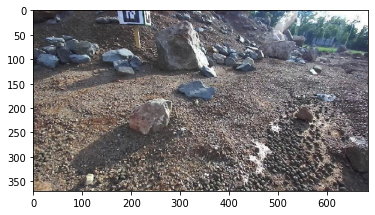

In [ ]:
imshow(img)

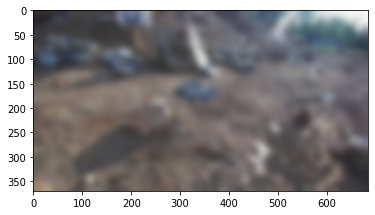

In [ ]:
# blur = cv2.blur(img,(8,8))
blur = cv2.GaussianBlur(img,(45,45),0)
imshow(blur)

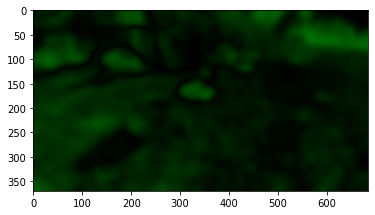

In [ ]:
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
bright = hsv[:,:,2].copy()

hsv[:,:,0] = 0
hsv[:,:,2] = 0
imshow(hsv)

In [ ]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

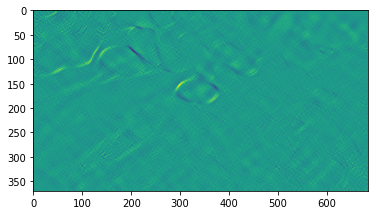

In [ ]:
new_gray = hsv[:,:,1]
# new_gray = gray
# imshow(new_gray)
laplacian = cv2.Sobel(new_gray,cv2.CV_64F,1,1, ksize=7)
l = laplacian
edges = cv2.Canny(new_gray, 1,1)
plt.imshow(l)


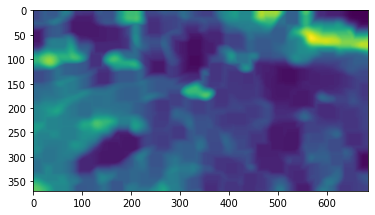

In [ ]:
kernel = np.ones((20,20),np.uint8)
new_gray = cv2.morphologyEx(new_gray, cv2.MORPH_CLOSE, kernel)

plt.imshow(new_gray)

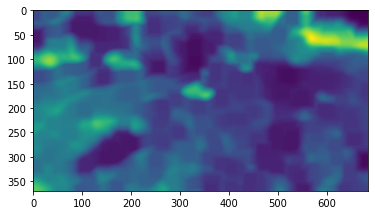

In [ ]:
new_gray = cv2.GaussianBlur(new_gray,(5,5),0)

plt.imshow(new_gray)

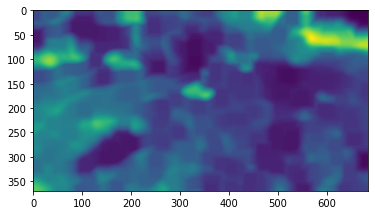

In [ ]:
new_gray *= int(255/(new_gray.max() if new_gray.max()!=0 else 0.0000001))
plt.imshow(new_gray)




6

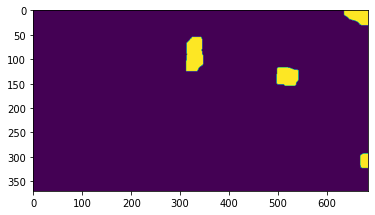

In [ ]:
cut_img_gray = new_gray[HEIGHT_CUT:,:]
stone_min_t = np.min(cut_img_gray)

display(stone_min_t)
STONE_MIN_THRESH =  stone_min_t*2



ret,thresh = cv2.threshold(new_gray,STONE_MIN_THRESH,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)


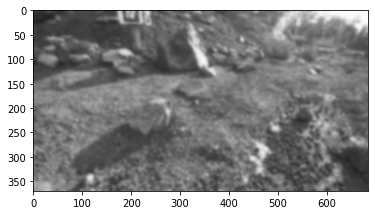

In [ ]:
imshow(bright)

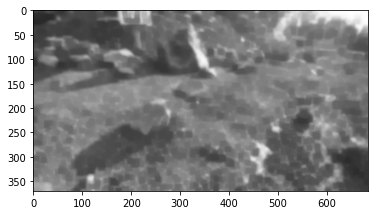

In [ ]:
bright_kernel = np.ones((8,8),np.uint8)
bright_closing = cv2.morphologyEx(bright, cv2.MORPH_CLOSE, bright_kernel)
imshow(bright_closing)

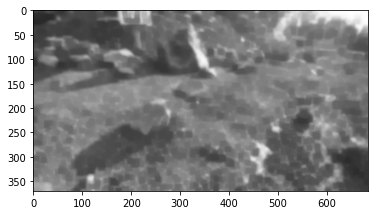

In [ ]:
bright_closing *= int(255/(bright_closing.max() if bright_closing.max()!=0 else 0.0000001))
imshow(bright_closing)

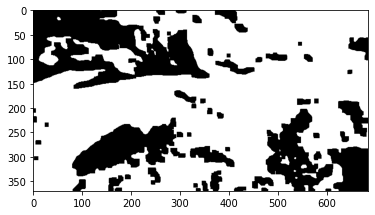

In [ ]:
SHADOW_MIN_THRESH = 100
ret,thresh_bright = cv2.threshold(bright_closing,SHADOW_MIN_THRESH,255,cv2.THRESH_BINARY)
imshow(thresh_bright)

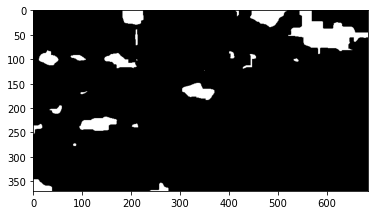

In [ ]:




resulting_thresh = cv2.bitwise_and((cv2.bitwise_not(thresh) + cv2.bitwise_not(thresh_bright)), thresh_bright)

imshow(resulting_thresh)

210.5
263
587.5
260
153.5
140
1438.5
132
195.5
104
1315.5
66
653.5
8
321.0
4


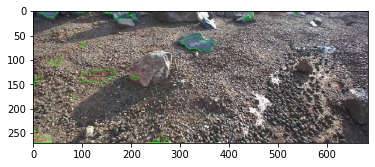

In [ ]:


resulting_thresh = resulting_thresh.copy()[HEIGHT_CUT:,:]



img_contours, _ = cv2.findContours(resulting_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_with_stone_contours = img.copy()[HEIGHT_CUT:,:]

STONE_AREA_MIN_SIZE = 100#TODO calculate by Y


stone_contours = []


for cnt in img_contours:
            if (cv2.contourArea(cnt) > STONE_AREA_MIN_SIZE):
                print(cv2.contourArea(cnt))
                M = cv2.moments(cnt)
                if M["m00"] == 0:
                    M["m00"] == 0.00000001
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                print(cY)
                cv2.circle(img_with_stone_contours, (cX, cY), 5, (0, 0, 255), -1)

                stone_contours.append(cnt)

                    
imshow(cv2.drawContours(img.copy()[HEIGHT_CUT:,:], img_contours, -1, (0, 255, 0)))



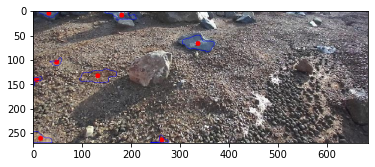

In [ ]:
cv2.drawContours(img_with_stone_contours, stone_contours, -1, (255, 0, 0))
imshow(img_with_stone_contours)